# Graph Embedding - Degree of Seperation

In [2]:
import tweepy
import json
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from batoomer.network.degree_separation import degree_of_separation_probabilistic

In [2]:
twitter_credentials = []
with open('../../../../twitter_credentials.json', 'r') as f:
    twitter_credentials = json.load(f)   

# Validation Set

In [3]:
# Read Validation Set
data = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_validation_set.csv', )
data = data.replace(np.nan, '')
data.head()

screen_name                           name  \
0   papakostakater  ŒöŒëŒ§ŒïŒ°ŒôŒùŒë Œ†ŒëŒ†ŒëŒöŒ©Œ£Œ§Œë - Œ†ŒëŒõŒôŒüŒ•Œ°Œë   
1         raptizoi                      ŒñœâŒÆ Œ°Œ¨œÄœÑŒ∑   
2        nkerameus                  Niki Kerameus   
3    AndreasPoulas                 ŒëŒΩŒ¥œÅŒ≠Œ±œÇ Œ†ŒøœÖŒªŒ¨œÇ   
4  Dora_Bakoyannis              ŒùœÑœåœÅŒ± ŒúœÄŒ±Œ∫ŒøŒ≥ŒπŒ¨ŒΩŒΩŒ∑   

                                         description  statuses_count  \
0  ŒîŒπŒ∫Œ∑Œ≥œåœÅŒøœÇ ~ \nŒíŒøœÖŒªŒµœÖœÑŒÆœÇ ŒùŒ≠Œ±œÇ ŒîŒ∑ŒºŒøŒ∫œÅŒ±œÑŒØŒ±œÇ ŒùŒøŒºŒøœç...              77   
1  Œ•œÜœÖœÄŒøœÖœÅŒ≥œåœÇ Œ•Œ≥ŒµŒØŒ±œÇ, BŒøœÖŒªŒµœÖœÑŒÆœÇ Œí1 ŒíŒøœÅŒµŒØŒøœÖ Œ§ŒøŒºŒ≠Œ± ...            1891   
2  Œ•œÄŒøœÖœÅŒ≥œåœÇ Œ†Œ±ŒπŒ¥ŒµŒØŒ±œÇ Œ∫Œ±Œπ ŒòœÅŒ∑œÉŒ∫ŒµœÖŒºŒ¨œÑœâŒΩ, ŒíŒøœÖŒªŒµœÖœÑŒÆœÇ ...            5135   
3            ŒíŒøœÖŒªŒµœÖœÑŒÆœÇ Œù. ŒëœÅŒ≥ŒøŒªŒØŒ¥Œ±œÇ - ŒöŒôŒùŒóŒúŒë ŒëŒõŒõŒëŒìŒóŒ£             326   
4  To ŒªŒøŒ≥Œ±œÅŒπŒ±œÉŒºœå œÉœÖŒΩŒÆŒ∏œâœÇ œáŒµŒπœÅŒØŒ∂ŒµœÑŒ±Œπ œÉœÖŒΩŒµœÅŒ≥Œ¨œÑŒ∑œÇ ŒºŒø...           13916   

                                   recent_100_tweets  friends_count  \
0   RT @MarkopoulosChTh: The ReMARKables: Œó ŒíŒøœÖŒªŒµ...            202   
1   RT @MegaTvOfficial: Œ†ŒøŒªŒπœÑŒπŒ∫ŒÆ Œ±ŒΩœÑŒπœÄŒ±œÅŒ¨Œ∏ŒµœÉŒ∑ Œ≥ŒπŒ±...            861   
2   ŒàŒΩŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒºŒÆŒΩœÖŒºŒ± œÑŒ∑œÇ œÉŒ∑ŒºŒµœÅŒπŒΩŒÆœÇ Œ∑ŒºŒ≠œÅŒ±œÇ œÄœÅŒøœÇ...            714   
3   RT @amna_news: .@AndreasPoulas (#ŒöŒôŒùŒëŒõ): ¬´Œ†ŒøŒª...             99   
4   Œ£œÖŒΩŒ≠ŒΩœÑŒµœÖŒæŒ∑ ŒùœÑœåœÅŒ±œÇ ŒúœÄŒ±Œ∫ŒøŒ≥ŒπŒ¨ŒΩŒΩŒ∑ œÉœÑŒøŒΩ @SkaitvGR ...           6825   

                               recent_100_friends_nd  followers_count  \
0   Markopoulos_Ch_Th | BA Communication Speciali...              159   
1   Kamala Harris Fighting for the people. Wife, ...             2667   
2   European Commission üá™üá∫ News and information f...            40000   
3   Aggelos Gavris ŒëœÅœáŒπœÉœÖŒΩœÑŒ¨Œ∫œÑŒ∑œÇ / ŒπŒ¥ŒπŒøŒ∫œÑŒÆœÑŒ∑œÇ @Th...              389   
4   Michael Bertakis 36 years old Work Provisions...           155118   

   default_profile_image  favourites_count  parliament_member  \
0                  False                94                  1   
1                  False              4252                  1   
2                  False              2809                  1   
3                  False               200                  1   
4                  False              3184                  1   

   friends_politician_count_1000  followers_politician_count_1000  \
0                             98                             13.0   
1                            251                              4.0   
2                            202                              0.0   
3                             43                              9.0   
4                            103                              0.0   

   mentions_politician_count  
0                          0  
1                         50  
2                         32  
3                         22  
4                          6

## Calculate Degrees

In [4]:
destination = ['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
               'kmitsotakis','atsipras', 'FofiGennimata', 'velopky', 'yanisvaroufakis']

degrees = []
for user in tqdm(data.screen_name):
    dist_vect = []
    print(f'Calculating Degrees for {user}')
    for dest in destination:
        dist = degree_of_separation_probabilistic(twitter_credentials=twitter_credentials, source=user, destination=dest, verbose=0)
        dist_vect.append(dist)
    print(dist_vect)
    degrees.append(dist_vect)

  0%|          | 0/100 [00:00<?, ?it/s]

Calculating Degrees for papakostakater


Rate limit reached. Sleeping for: 702


[1, 2, 2, 2, 2, 1, 1, 2, 2, 3]
Calculating Degrees for raptizoi


Rate limit reached. Sleeping for: 852


[1, 2, 2, 2, 2, 1, 1, 1, 1, 2]
Calculating Degrees for nkerameus


Rate limit reached. Sleeping for: 863


[1, 1, 1, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for AndreasPoulas


Rate limit reached. Sleeping for: 860


[3, 3, 1, 2, 2, 3, 3, 1, 2, 3]
Calculating Degrees for Dora_Bakoyannis
[1, 1, 1, 2, 2, 2, 1, 1, 1, 2]
Calculating Degrees for GVaremenos


Rate limit reached. Sleeping for: 856


[2, 1, 2, 2, 2, 3, 1, 2, 2, 2]
Calculating Degrees for a_vesiropoulos


Rate limit reached. Sleeping for: 853


[1, 3, 2, 2, 2, 1, 3, 3, 2, 3]
Calculating Degrees for tzakri
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for atsipras


Rate limit reached. Sleeping for: 771


[1, 1, 2, 2, 2, 1, 0, 1, 2, 4]
Calculating Degrees for joikonomou
[1, 1, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for dimitrisbiagkis


Rate limit reached. Sleeping for: 736


[3, 3, 1, 2, 2, 1, 3, 1, 2, 2]
Calculating Degrees for samaras_antonis


Rate limit reached. Sleeping for: 54
Rate limit reached. Sleeping for: 781


[1, 2, 2, 3, 3, 3, 3, 2, 3, 3]
Calculating Degrees for FKarasarlidou


Rate limit reached. Sleeping for: 859


[3, 1, 2, 2, 2, 3, 1, 2, 3, 1]
Calculating Degrees for d_tzanakopoulos


Rate limit reached. Sleeping for: 850


[1, 1, 2, 2, 2, 1, 1, 1, 2, 4]
Calculating Degrees for chrysomallism


Rate limit reached. Sleeping for: 696


[3, 2, 2, 2, 2, 1, 1, 2, 2, 4]
Calculating Degrees for sokrvardakis
[2, 2, 2, 2, 2, 2, 1, 2, 2, 3]
Calculating Degrees for GVagionas


Rate limit reached. Sleeping for: 742


[1, 3, 2, 3, 2, 1, 3, 1, 2, 3]
Calculating Degrees for SimosKedikoglou


Rate limit reached. Sleeping for: 858


[1, 2, 2, 2, 2, 1, 4, 2, 1, 1]
Calculating Degrees for RoussopoulosTh


Rate limit reached. Sleeping for: 642
Rate limit reached. Sleeping for: 472


[1, 5, 3, 3, 3, 4, 4, 5, 3, 5]
Calculating Degrees for amirasgiorgos


Rate limit reached. Sleeping for: 711


[1, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for giannoul
[1, 1, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for ioannis_mpougas


Rate limit reached. Sleeping for: 858


[1, 2, 2, 2, 2, 1, 2, 2, 2, 4]
Calculating Degrees for georgantasgr


Rate limit reached. Sleeping for: 777


[3, 2, 2, 2, 2, 1, 3, 3, 3, 3]
Calculating Degrees for BurhanBaranDr


Rate limit reached. Sleeping for: 858


[2, 2, 1, 2, 2, 3, 3, 1, 2, 2]
Calculating Degrees for ViliardosV


Rate limit reached. Sleeping for: 773


[1, 3, 1, 1, 2, 1, 1, 1, 1, 1]
Calculating Degrees for pskourl
[2, 1, 2, 2, 2, 2, 1, 2, 2, 1]
Calculating Degrees for tsakalotos


Rate limit reached. Sleeping for: 853


[3, 1, 2, 2, 2, 3, 1, 2, 2, 1]
Calculating Degrees for mvlazaridis


Rate limit reached. Sleeping for: 842


[1, 1, 1, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for Arvanitidis_Geo
[1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
Calculating Degrees for olgakef


Rate limit reached. Sleeping for: 863


[1, 1, 2, 2, 2, 1, 5, 1, 1, 4]
Calculating Degrees for fbaraliakos


Rate limit reached. Sleeping for: 619


[1, 2, 2, 2, 2, 1, 2, 2, 2, 1]
Calculating Degrees for thanos_moraitis


Rate limit reached. Sleeping for: 855


[2, 1, 2, 2, 2, 2, 1, 1, 2, 2]
Calculating Degrees for nikosfilis1


Rate limit reached. Sleeping for: 857


[3, 1, 2, 2, 2, 3, 1, 3, 3, 3]
Calculating Degrees for Vkikilias
[1, 2, 2, 2, 2, 1, 2, 1, 1, 4]
Calculating Degrees for marilizaxen


Rate limit reached. Sleeping for: 694


[4, 2, 2, 2, 2, 2, 3, 2, 2, 1]
Calculating Degrees for ChStefanadis


Rate limit reached. Sleeping for: 845


[1, 3, 2, 3, 2, 1, 1, 1, 2, 1]
Calculating Degrees for e_stylianidis


Rate limit reached. Sleeping for: 860


[1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for PanasApostolos
[3, 2, 1, 2, 2, 3, 3, 1, 2, 2]
Calculating Degrees for KostasVlasis


Rate limit reached. Sleeping for: 854


[1, 2, 2, 2, 2, 1, 3, 3, 2, 1]
Calculating Degrees for tsigris_angelos


Rate limit reached. Sleeping for: 717
Rate limit reached. Sleeping for: 834


[1, 3, 2, 3, 3, 1, 3, 3, 3, 3]
Calculating Degrees for GKoumoutsakos
[1, 1, 1, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for The_Leontaridis


Rate limit reached. Sleeping for: 860


[1, 2, 2, 2, 2, 1, 3, 2, 2, 3]
Calculating Degrees for karamanlis_k


Rate limit reached. Sleeping for: 848


[1, 2, 2, 2, 2, 1, 2, 2, 2, 3]
Calculating Degrees for YiannisLoverdos
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Calculating Degrees for BSkoufa


Rate limit reached. Sleeping for: 842


[3, 1, 2, 2, 2, 2, 1, 2, 2, 4]
Calculating Degrees for gragkousis


Rate limit reached. Sleeping for: 720
Rate limit reached. Sleeping for: 37


[2, 1, 2, 2, 2, 2, 1, 1, 2, 3]
Calculating Degrees for yiannismelas


Rate limit reached. Sleeping for: 747


[1, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for YDragasakis
[3, 1, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for olgagerovasili


Rate limit reached. Sleeping for: 793


[1, 1, 1, 2, 1, 1, 1, 1, 2, 1]
Calculating Degrees for OikonomouVasili


Rate limit reached. Sleeping for: 856


[1, 2, 2, 2, 2, 1, 2, 2, 2, 2]
Calculating Degrees for brooks_evi


Rate limit reached. Sleeping for: 389


[3, 3, 2, 4, 4, 4, 5, 2, 2, 1]
Calculating Degrees for karamanli72


Rate limit reached. Sleeping for: 413
Rate limit reached. Sleeping for: 432


[4, 3, 3, 4, 3, 4, 4, 4, 3, 3]
Calculating Degrees for vasilisgio
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 57


[5, 5, None, 4, None, 4, 4, 5, 5, 4]
Calculating Degrees for KellasAchi
[1, 2, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for gefthimiou


Rate limit reached. Sleeping for: 224
Rate limit reached. Sleeping for: 557


[3, 3, 2, 2, 2, 3, 3, 2, 2, 1]
Calculating Degrees for Georgadas


Rate limit reached. Sleeping for: 792


[3, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for JohnVagion
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for helena_raptis


Rate limit reached. Sleeping for: 667


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 150


[4, 4, 3, 4, None, 4, 4, 4, 3, 4]
Calculating Degrees for MobakosS


Rate limit reached. Sleeping for: 366


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 253


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 185


[4, 4, None, 4, 6, 5, 4, 4, None, 4]
Calculating Degrees for mahisakorafa


Rate limit reached. Sleeping for: 553


[4, 4, 2, 3, 3, 3, 4, 3, 3, 3]
Calculating Degrees for Ipsilantis1917


Rate limit reached. Sleeping for: 547
Rate limit reached. Sleeping for: 8


[3, 3, 2, 2, 2, 3, 2, 2, 2, 1]
Calculating Degrees for andrpapandreou_


Rate limit reached. Sleeping for: 819


[2, 1, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for q4JbLQUiOaQNIfJ


Rate limit reached. Sleeping for: 638


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 272
Rate limit reached. Sleeping for: 223


[4, 3, 5, 5, None, 4, 4, 4, 3, 5]
Calculating Degrees for BrigTheoxaris
[2, 2, 2, 2, 2, 1, 2, 2, 2, 1]
Calculating Degrees for vasilikigian82


Rate limit reached. Sleeping for: 745
Rate limit reached. Sleeping for: 81


[3, 3, 2, 3, 3, 1, 1, 3, 2, 3]
Calculating Degrees for escapecorfu


Rate limit reached. Sleeping for: 704


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 263


[3, 3, 2, 2, None, 4, 1, 5, 2, 4]
Calculating Degrees for MdChristos


Rate limit reached. Sleeping for: 92
Rate limit reached. Sleeping for: 626


[3, 3, 3, 2, 3, 3, 3, 3, 2, 3]
Calculating Degrees for QMsHYvXHGJj0Ncl


Rate limit reached. Sleeping for: 520


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 5, 5, 4, None, None, 4, 4, 5, 3]
Calculating Degrees for kostasplevris


Rate limit reached. Sleeping for: 298
Rate limit reached. Sleeping for: 156
Rate limit reached. Sleeping for: 704


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Calculating Degrees for bsimopoulos9
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 524


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, None, None, None, 4, 4, 4, 4, 4]
Calculating Degrees for CharilaosKara


Rate limit reached. Sleeping for: 129
Rate limit reached. Sleeping for: 172


[4, 3, 2, 2, 2, 3, 4, 2, 2, 1]
Calculating Degrees for 5eh58Ejx5fT5cyL


Rate limit reached. Sleeping for: 504


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 64


[4, 4, 5, 4, None, 4, 4, 4, 5, 4]
Calculating Degrees for adamoumarios1


Rate limit reached. Sleeping for: 160


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 15
Rate limit reached. Sleeping for: 465


[3, 3, 2, 4, None, 1, 1, 3, 2, 1]
Calculating Degrees for ELEFTHERIADOU_P
[1, 3, 2, 2, 2, 1, 3, 2, 2, 3]
Calculating Degrees for adiavroxoi


Rate limit reached. Sleeping for: 857


[1, 1, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for politics_gr


Rate limit reached. Sleeping for: 860


[1, 1, 2, 3, 3, 1, 1, 3, 3, 1]
Calculating Degrees for PTriantafyllidi


Rate limit reached. Sleeping for: 852


[3, 3, 2, 2, 2, 1, 3, 2, 2, 1]
Calculating Degrees for valiliathisisi


Rate limit reached. Sleeping for: 773


[2, 3, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for basoyla1989


Rate limit reached. Sleeping for: 806


[3, 4, 3, 3, 3, 3, 6, 3, 2, 3]
Calculating Degrees for skliro_vatraxi


Rate limit reached. Sleeping for: 422


[3, 2, 2, 2, 2, 4, 4, 3, 2, 1]
Calculating Degrees for AhmetZappa


Rate limit reached. Sleeping for: 389


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 56


[4, 4, None, 4, None, 4, 3, 4, 4, 3]
Calculating Degrees for eBrRqxfKjvgfarW


Rate limit reached. Sleeping for: 173


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 5, 4, 4, None, 5, 4, 4, 4, 5]
Calculating Degrees for chrisstaikouras


Rate limit reached. Sleeping for: 17


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 10
Rate limit reached. Sleeping for: 48


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 5, None, 4, None, 4, 4, 4, 4, None]
Calculating Degrees for spiros_st


Rate limit reached. Sleeping for: 309


[4, 4, 3, 3, 3, 4, 3, 3, 3, 1]
Calculating Degrees for vltheolog
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for valiamonogiou


Rate limit reached. Sleeping for: 409


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 393


[4, 4, 4, 3, None, 4, 4, 4, 5, 4]
Calculating Degrees for andymilonakis


Rate limit reached. Sleeping for: 4


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 243


[4, 4, None, 5, None, 3, 3, 4, 4, 3]
Calculating Degrees for J9580706875


Rate limit reached. Sleeping for: 77
Rate limit reached. Sleeping for: 101
Rate limit reached. Sleeping for: 527


[4, 3, 3, 3, 3, 4, 4, 3, 3, 3]
Calculating Degrees for PetrosAvlonitis
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for 4Artemhs4


Rate limit reached. Sleeping for: 851


[3, 3, 3, 3, 3, 3, 3, 3, 3, 4]
Calculating Degrees for NikXanthopoulos


Rate limit reached. Sleeping for: 427
Rate limit reached. Sleeping for: 419


[3, 3, 2, 2, 2, 4, 4, 2, 2, 4]
Calculating Degrees for 6ad1284c1215451


Rate limit reached. Sleeping for: 701


[1, 2, 2, 2, 2, 1, 4, 2, 2, 4]
Calculating Degrees for periergod


Rate limit reached. Sleeping for: 551


[3, 3, 3, 2, 1, 3, 1, 2, 3, 1]
Calculating Degrees for koctakoc13
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 487


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 295


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 3, 3, None, None, 3, 5, 3, None, None]
Calculating Degrees for 39lmyuOy0R5Q2MD


Rate limit reached. Sleeping for: 528


[3, 3, 3, 3, 3, 1, 1, 3, 3, 3]
Calculating Degrees for EffyVayena
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 698


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[3, 4, None, 4, None, 4, 4, 2, 4, 3]
Calculating Degrees for yani_griek


Rate limit reached. Sleeping for: 229


Something went wrong!
Not authorized.


Rate limit reached. Sleeping for: 261


Something went wrong!
Not authorized.


Rate limit reached. Sleeping for: 147


Something went wrong!
Not authorized.


Rate limit reached. Sleeping for: 26


Something went wrong!
Not authorized.
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, None, 4, None, 4, 4, None, None, None]
Calculating Degrees for XATZIDAKIS_ANTR


Rate limit reached. Sleeping for: 562


[3, 3, 2, 2, 2, 3, 1, 2, 3, 1]
Calculating Degrees for giorgis_anton


Rate limit reached. Sleeping for: 768


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[2, 4, 2, 2, 2, 2, 1, 1, 2, None]
Calculating Degrees for dimasb88
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 194


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, None, 4, None, 4, 4, 4, 4, 3]


In [157]:
dg = pd.DataFrame(degrees, columns=destination)
dg = dg.replace(np.nan, -1)

In [158]:
dg['screen_name'] = data['screen_name']
dg = dg[[,'screen_name', 'neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi',
       'mera25_gr', 'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky',
       'yanisvaroufakis']]

In [159]:
dg.to_csv('parliament_members_degree_of_seperation_validation_set.csv', index=False)

# Training Set

In [376]:
# Read Validation Set
data = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_training_set.csv', )
data = data.replace(np.nan, '')
data.head()

screen_name                    name  \
0         evefthym      ŒïœÖŒ¨Œ≥Œ≥ŒµŒªŒøœÇ ŒïœÖŒ∏œÖŒºŒØŒøœÖ   
1  Qdv6zNFe0nkBH2m       ŒßœÅŒπœÉœÑŒØŒΩŒ± ŒöŒµœÅŒ±ŒºŒµœâœÇ   
2     michail_pana  ŒúŒπœáŒ±ŒÆŒª Œ†Œ±ŒΩŒ±Œ≥ŒπœâœÑœåœÄŒøœÖŒªŒøœÇ   
3  spirtzisforever    ŒßœÅŒÆœÉœÑŒøœÇ not Œ£œÄŒØœÅœÑŒ∂Œ∑œÇ   
4  FdZwMqKWXciTydT            ŒïŒπœÅŒÆŒΩŒ∑ ŒìŒ∫Œ±œÅŒ±   

                                         description  statuses_count  \
0                        ŒöŒ±ŒΩŒ±ŒªŒ¨Œ∫Œπ \nŒ†Œ¨œÅŒ≥Œ± \nŒôœâŒ¨ŒΩŒΩŒπŒΩŒ±             135   
1                                            ŒßŒπŒøœçŒºŒøœÅ               0   
2  ŒëœÄœåœÉœÑœÅŒ±œÑŒøœÇ ŒùŒ±œçŒ±œÅœáŒøœÇ œÑŒøœÖ Œ†ŒøŒªŒ≠ŒºŒπŒ∫Œøœç ŒùŒ±œÖœÑŒπŒ∫Œøœç.\nŒú...             368   
3  Parody account/Fan account œÑŒøœÖ œÄŒπŒø ŒµœÅœâœÑŒπŒ∫Œøœç Œ≤Œø...               7   
4                                                                  1   

                                   recent_100_tweets  friends_count  \
0   #NewProfilePic https://t.co/h0wlMIS6U0 @wavyp...            156   
1                                                                18   
2   ŒüœÅŒ∏ŒÆ Œ∫Œ±Œπ œÑŒµŒ∫ŒºŒ∑œÅŒπœâŒºŒ≠ŒΩŒ∑ œÄœÅŒøœÉŒ≠Œ≥Œ≥ŒπœÉŒ∑. \nŒ£œÖŒ≥œáŒ±œÅŒ∑œÑŒÆ...             70   
3   @NasosNot ŒïœÄŒπ Œ†ŒëŒ£ŒüŒö ŒµŒØœáŒ±ŒºŒµ Œ∫ŒªŒ±Œ¥ŒπŒ∫Œ≠œÇ, Œ±œÖœÑœå ŒÆœÑŒ±...              7   
4                                     ŒöŒ±Œªœå Œ≤œÅŒ¨Œ¥œÖ!!!!              3   

                               recent_100_friends_nd  followers_count  \
0   Panagiotis Vougious ŒöœçœÅŒπŒµ ŒúŒ¨œÑœÉŒπŒø ŒπœÉœáœÖœÅŒØŒ∂ŒµœÑŒ±Œπ ...              448   
1   Kostas.Vaxevanis œáœÅŒÆœÉœÑŒ∑œÇ œÑŒøœÖ https://t.co/ArS...                6   
2   Symban 300 UFCüá¨üá∑üá¶üá≤üá®üáæüá∑üá∏üá∏üá¶üá´üá∑üáÆüá±üá¶üáπüáßüá¨ Xara Stefano...              358   
3   ŒùŒ¨œÉŒøœÇ ŒóŒªŒπœåœÄŒøœÖŒªŒøœÇ ŒïŒ∫œÄœÅœåœÉœâœÄŒøœÇ Œ§œçœÄŒøœÖ œÑŒøœÖ Œ£Œ•Œ°ŒôŒñŒë-...                4   
4   Kostas.Vaxevanis œáœÅŒÆœÉœÑŒ∑œÇ œÑŒøœÖ https://t.co/ArS...                0   

   default_profile_image  favourites_count  parliament_member  \
0                  False               696                  0   
1                  False                 3                  0   
2                  False               658                  0   
3                  False                 2                  0   
4                  False                 0                  0   

   friends_politician_count_1000  followers_politician_count_1000  \
0                              5                              3.0   
1                              3                              0.0   
2                              0                              2.0   
3                              1                              0.0   
4                              0                              0.0   

   mentions_politician_count  
0                          0  
1                          0  
2                          0  
3                          2  
4                          0

## Calculate Degrees

In [386]:
destination = ['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
               'kmitsotakis','atsipras', 'FofiGennimata', 'velopky', 'yanisvaroufakis']

degrees = []
for user in tqdm(data.screen_name):
    dist_vect = []
    print(f'Calculating Degrees for {user}')
    for dest in destination:
        try:
            dist = degree_of_separation_probabilistic(twitter_credentials=twitter_credentials, source=user, destination=dest, verbose=0)
            dist_vect.append(dist)
        except Exception as err:
            print(err)
            dist = None
            dist_vect.append(dist)
            print('===============')
    print(dist_vect)
    degrees.append(dist_vect)

  0%|          | 0/300 [00:00<?, ?it/s]

Calculating Degrees for evefthym
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 255


[3, 3, 2, 4, None, 4, 4, 4, 4, 4]
Calculating Degrees for Qdv6zNFe0nkBH2m


Rate limit reached. Sleeping for: 706


[3, 3, 2, 3, 2, 1, 1, 3, 2, 3]
Calculating Degrees for michail_pana


Rate limit reached. Sleeping for: 780


[3, 3, 2, 2, 2, 3, 3, 2, 2, 3]
Calculating Degrees for spirtzisforever
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
[None, None, None, None, None, None, None, None, None, None]
Calculating Degrees for FdZwMqKWXciTydT


Rate limit reached. Sleeping for: 648


[3, 3, 3, 3, 3, 3, 5, 3, 3, 5]
Calculating Degrees for R7xLvX35rnq6jHD


Rate limit reached. Sleeping for: 465
Rate limit reached. Sleeping for: 857


[3, 3, 3, 3, 3, 3, 3, 2, 2, 3]
Calculating Degrees for Kbitzenis


Rate limit reached. Sleeping for: 626


[3, 2, 2, 2, 2, 1, 1, 3, 2, 1]
Calculating Degrees for contagaras
[1, 2, 2, 2, 2, 1, 2, 2, 2, 3]
Calculating Degrees for _varemenos


Rate limit reached. Sleeping for: 850


[3, 3, 2, 2, 2, 3, 1, 3, 2, 1]
Calculating Degrees for Geo_Psychogios


Rate limit reached. Sleeping for: 852


[2, 2, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for IwannaPapakosta


Rate limit reached. Sleeping for: 750


[2, 3, 2, 2, 2, 2, 2, 3, 2, 2]
Calculating Degrees for scand461


Rate limit reached. Sleeping for: 700


[2, 3, 2, 2, 2, 3, 3, 1, 2, 3]
Calculating Degrees for ASMForchestra
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 81


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, None, 4, None, 4, 4, 4, 4, 3]
Calculating Degrees for kokath1


Rate limit reached. Sleeping for: 470


[1, 2, 2, 2, 2, 1, 2, 2, 2, 2]
Calculating Degrees for ArdimasGreek
'a' cannot be empty unless no samples are taken


Rate limit reached. Sleeping for: 91


'a' cannot be empty unless no samples are taken
'a' cannot be empty unless no samples are taken
'a' cannot be empty unless no samples are taken
'a' cannot be empty unless no samples are taken
'a' cannot be empty unless no samples are taken


Rate limit reached. Sleeping for: 104


'a' cannot be empty unless no samples are taken
'a' cannot be empty unless no samples are taken
'a' cannot be empty unless no samples are taken
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[None, None, None, None, None, None, None, None, None, None]
Calculating Degrees for kostis_8


Rate limit reached. Sleeping for: 583


[1, 1, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for TassYpsi
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 511


[4, 4, None, 3, None, 1, 3, 3, 3, 4]
Calculating Degrees for Cattaneomadness


Rate limit reached. Sleeping for: 616


[2, 2, 2, 2, 2, 3, 3, 3, 3, 1]
Calculating Degrees for vasileiadistheo


Rate limit reached. Sleeping for: 657


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, 2, 2, 2, 3, 3, 2, 3, None]
Calculating Degrees for Re9ioxGFl3JAlq8


Rate limit reached. Sleeping for: 625


[1, 2, 2, 2, 2, 1, 2, 2, 2, 2]
Calculating Degrees for gigilonis13


Rate limit reached. Sleeping for: 853


[2, 1, 2, 2, 1, 1, 1, 1, 2, 1]
Calculating Degrees for PerkaMirsin


Rate limit reached. Sleeping for: 805


[3, 4, 3, 3, 3, 3, 4, 3, 3, 1]
Calculating Degrees for TheZuluPope
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
[None, None, None, None, None, None, None, None, None, None]
Calculating Degrees for mdragasakis


Rate limit reached. Sleeping for: 219


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 191


[5, 4, None, 3, None, 4, 4, 5, 3, 3]
Calculating Degrees for znqavLFucjg1pAW
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
Something went wrong!
[{'code': 63, 'message': 'User has been suspended.'}]
[None, None, None, None, None, None, None, None, None, None]
Calculating Degrees for NTsK45AaPmM9U5P
max() arg is an empty sequence
max() arg is an empty sequence


Rate limit reached. Sleeping for: 359


max() arg is an empty sequence
max() arg is an empty sequence


Rate limit reached. Sleeping for: 41


max() arg is an empty sequence
max() arg is an empty sequence
[None, None, None, None, None, None, None, None, None, None]
Calculating Degrees for 32Giannakis
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for okalantaksei
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 400


[3, 3, 2, 2, 2, None, 1, 2, 2, 1]
Calculating Degrees for magkakos_


Rate limit reached. Sleeping for: 549


[3, 3, 2, 2, 2, 4, 2, 3, 4, 4]
Calculating Degrees for vasiliadisg


Rate limit reached. Sleeping for: 481


[3, 3, 2, 2, 2, 4, 2, 2, 2, 1]
Calculating Degrees for StylianidesEU
[1, 2, 2, 2, 2, 1, 1, 2, 2, 2]
Calculating Degrees for QUKCyT1PGeA7XVx


Rate limit reached. Sleeping for: 799


[1, 4, 2, 2, 2, 1, 1, 2, 2, 4]
Calculating Degrees for gevardakis


Rate limit reached. Sleeping for: 670


[2, 2, 1, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for AlexandraOikon


Rate limit reached. Sleeping for: 28
Rate limit reached. Sleeping for: 824


[2, 3, 2, 2, 3, 3, 3, 3, 1, 3]
Calculating Degrees for UKgOpsbs5j5jRya


Rate limit reached. Sleeping for: 449


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 151


Something went wrong!
Not authorized.
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, None, None, None, None, 4, 4, 5, None, None]
Calculating Degrees for ypizgbKtHYwKTzy
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for eleni_336


Rate limit reached. Sleeping for: 311
Rate limit reached. Sleeping for: 58


[3, 2, 2, 2, 2, 3, 3, 2, 2, 3]
Calculating Degrees for HtaHYlbwj3faSI5


Rate limit reached. Sleeping for: 792


[3, 3, 2, 1, 3, 3, 3, 2, 1, 3]
Calculating Degrees for P6JBcKHrkvXQnN4


Rate limit reached. Sleeping for: 689


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 46


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 5, None, 4, 4, 4, 4, 4, None, 1]
Calculating Degrees for dimitrisxioy


Rate limit reached. Sleeping for: 289
Rate limit reached. Sleeping for: 101


[3, 2, 2, 2, 2, 2, 2, 3, 2, 1]
Calculating Degrees for Eliamarkopoulos


Rate limit reached. Sleeping for: 665


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, None, 4, None, 5, 3, 4, 4, 3]
Calculating Degrees for Constantine_Zr
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'U

Rate limit reached. Sleeping for: 59


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[None, 5, None, None, None, 4, 4, 4, 5, 4]
Calculating Degrees for rgos_gio


Rate limit reached. Sleeping for: 517


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[2, 2, 2, 2, 2, 4, 2, 2, 2, None]
Calculating Degrees for PQyE5DQaigqYMXX


Rate limit reached. Sleeping for: 449
Rate limit reached. Sleeping for: 465


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[3, 4, 3, 3, 3, 4, 4, 2, 3, None]
Calculating Degrees for 7743535915


Rate limit reached. Sleeping for: 591


[3, 1, 2, 3, 2, 3, 1, 3, 3, 3]
Calculating Degrees for Eleni36632603


Rate limit reached. Sleeping for: 26
Rate limit reached. Sleeping for: 826


[3, 3, 2, 2, 3, 3, 3, 2, 2, 3]
Calculating Degrees for maikvroytsis


Rate limit reached. Sleeping for: 854


[2, 2, 2, 2, 3, 1, 3, 2, 3, 1]
Calculating Degrees for alexandroskyv
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Calculating Degrees for roulamakrigr


Rate limit reached. Sleeping for: 851


[2, 2, 2, 2, 2, 2, 2, 2, 2, 3]
Calculating Degrees for k5EFfu3RUHCPiUF


Rate limit reached. Sleeping for: 604


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 307


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[5, 4, None, 5, None, 3, 4, 4, None, None]
Calculating Degrees for c7c5b5fbe9284a4


Rate limit reached. Sleeping for: 29


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, None, 6, None, 5, 4, 4, 3, None]
Calculating Degrees for fXw0RAuhcJCIZJ1


Rate limit reached. Sleeping for: 317


[2, 1, 2, 2, 2, 5, 1, 2, 2, 2]
Calculating Degrees for sta1231


Rate limit reached. Sleeping for: 717


[3, 2, 3, 2, 2, 3, 3, 3, 3, 3]
Calculating Degrees for YotikaFitness


Rate limit reached. Sleeping for: 331


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 5, 2, 2, 5, 5, 4, 5, None, None]
Calculating Degrees for teo_vor


Rate limit reached. Sleeping for: 369
Rate limit reached. Sleeping for: 465


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[3, 3, 3, 3, 3, 3, 4, 3, 3, None]
Calculating Degrees for giannis3kala
[2, 1, 2, 2, 2, 2, 1, 2, 2, 1]
Calculating Degrees for iwannakiG


Rate limit reached. Sleeping for: 779
Rate limit reached. Sleeping for: 860


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Calculating Degrees for XKonstantinidis


Rate limit reached. Sleeping for: 496


[3, 1, 2, 2, 1, 4, 1, 2, 5, 1]
Calculating Degrees for moulk_nick


Rate limit reached. Sleeping for: 676


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[3, 3, 2, 3, 3, 4, 1, 3, 3, None]
Calculating Degrees for wl5vE3TXMDSM7r4
max() arg is an empty sequence
max() arg is an empty sequence
max() arg is an empty sequence
max() arg is an empty sequence
max() arg is an empty sequence
max() arg is an empty sequence
max() arg is an empty sequence
max() arg is an empty sequence


Rate limit reached. Sleeping for: 757


max() arg is an empty sequence
[None, None, None, None, None, None, None, 2, None, None]
Calculating Degrees for dvmantas
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for tahamata27
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for harrisz21gr
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
[None, None, None, None, None, None, None, None, None, 

Rate limit reached. Sleeping for: 4
Rate limit reached. Sleeping for: 32


[4, 4, None, 4, 2, 4, 4, 4, 3, 4]
Calculating Degrees for 07pbemsEvuIrUQU


Rate limit reached. Sleeping for: 285
Rate limit reached. Sleeping for: 211
Rate limit reached. Sleeping for: 647


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Calculating Degrees for llazaridis


Rate limit reached. Sleeping for: 838


[3, 1, 2, 2, 2, 3, 1, 2, 2, 1]
Calculating Degrees for Oly9TBdOlFahcnM
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for evanvage


Rate limit reached. Sleeping for: 828


[3, 3, 2, 3, 3, 3, 3, 3, 3, 3]
Calculating Degrees for afroditiapost


Rate limit reached. Sleeping for: 747


[3, 2, 2, 2, 2, 2, 2, 2, 2, 5]
Calculating Degrees for questsin
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for yiannisvoridis1
Something went wrong!
Not authorized.


Rate limit reached. Sleeping for: 361


Something went wrong!
Not authorized.
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 259


Something went wrong!
Not authorized.
Something went wrong!
Not authorized.


Rate limit reached. Sleeping for: 516


[4, None, None, 3, None, None, 4, None, 3, 4]
Calculating Degrees for j8Xsrfkk520r2aO
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 87


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Not authorized.
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 5, None, None, None, 5, 4, None, None, None]
Calculating Degrees for voloudakisgiann


Rate limit reached. Sleeping for: 83


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 347


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, None, 3, 3, 5, 4, 4, 3, None]
Calculating Degrees for maria_mpakadhma


Rate limit reached. Sleeping for: 380


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Calculating Degrees for alexlp4_


Rate limit reached. Sleeping for: 862
Rate limit reached. Sleeping for: 861


[3, 3, 3, 3, 3, 3, 3, 3, 2, 3]
Calculating Degrees for G9NpM20wG0bhicw


Rate limit reached. Sleeping for: 446
Rate limit reached. Sleeping for: 514


[4, 4, 3, 3, 3, 3, 3, 4, 3, 5]
Calculating Degrees for PanTsiara


Rate limit reached. Sleeping for: 394


[3, 3, 2, 3, 3, 3, 3, 2, 3, 5]
Calculating Degrees for VesiroNikos


Rate limit reached. Sleeping for: 509


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[3, 4, 4, 4, None, 4, 4, 4, 5, 4]
Calculating Degrees for georgexanthos06


Rate limit reached. Sleeping for: 322


[1, 1, 2, 2, 2, 1, 1, 2, 1, 1]
Calculating Degrees for kbougas


Rate limit reached. Sleeping for: 175
Rate limit reached. Sleeping for: 526


[3, 2, 2, 2, 2, 3, 4, 2, 2, 3]
Calculating Degrees for 2zzEDR6hwnciR7S


Rate limit reached. Sleeping for: 321


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 103


Something went wrong!
Not authorized.
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[5, 5, None, None, None, 4, 4, None, None, None]
Calculating Degrees for narab01


Rate limit reached. Sleeping for: 37


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 142


[4, 4, None, None, None, 5, 4, 2, 4, 4]
Calculating Degrees for pirkevin


Rate limit reached. Sleeping for: 573


[3, 1, 2, 2, 2, 3, 1, 2, 2, 3]
Calculating Degrees for PanasGiannhs
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for JamaisLeDimance


Rate limit reached. Sleeping for: 562


[3, 3, 2, 2, 2, 4, 4, 2, 2, 1]
Calculating Degrees for omorfamystika


Rate limit reached. Sleeping for: 569
Rate limit reached. Sleeping for: 459


[3, 3, 3, 3, 3, 3, 3, 3, 2, 3]
Calculating Degrees for PapandreouPASOK


Rate limit reached. Sleeping for: 495


[4, 4, 2, 2, 2, 4, 3, 4, 2, 4]
Calculating Degrees for nikos_gianoulis


Rate limit reached. Sleeping for: 351


[3, 1, 2, 3, 2, 1, 3, 2, 2, 1]
Calculating Degrees for G_Mpoutsikakis


Rate limit reached. Sleeping for: 248
Rate limit reached. Sleeping for: 583


[3, 3, 2, 2, 3, 2, 2, 3, 2, 3]
Calculating Degrees for ap_kokkalis


Rate limit reached. Sleeping for: 846


[1, 2, 2, 2, 2, 1, 2, 2, 2, 2]
Calculating Degrees for antonis_char


Rate limit reached. Sleeping for: 618


[3, 3, 2, 2, 2, 4, 2, 2, 2, 3]
Calculating Degrees for AhmadKadry
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for vassilis_lappas


Rate limit reached. Sleeping for: 568


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[2, 2, 2, 2, 2, 1, 4, 2, 2, None]
Calculating Degrees for ab1b8553db9b430
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for athanasiaxperk1


Rate limit reached. Sleeping for: 733


[3, 3, 2, 3, 3, 3, 3, 3, 2, 3]
Calculating Degrees for Galaziosparapol


Rate limit reached. Sleeping for: 12
Rate limit reached. Sleeping for: 775


[1, 3, 2, 2, 2, 1, 1, 1, 2, 3]
Calculating Degrees for PrigipoPoulos


Rate limit reached. Sleeping for: 488


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[3, 2, 2, 2, 2, 3, 1, 2, 2, None]
Calculating Degrees for DetlefMusic
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 126
Rate limit reached. Sleeping for: 46


[4, 4, None, 4, 2, 4, 4, 4, 2, 3]
Calculating Degrees for K9IsGBpmTctz4cj


Rate limit reached. Sleeping for: 143
Rate limit reached. Sleeping for: 50
Rate limit reached. Sleeping for: 576


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, 3, 3, 3, 4, 4, 3, 3, None]
Calculating Degrees for EleniAlexop


Rate limit reached. Sleeping for: 755


[1, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for antnik060
[3, 2, 2, 2, 2, 2, 3, 2, 2, 1]
Calculating Degrees for TriantafilidisG


Rate limit reached. Sleeping for: 799


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[3, 2, 2, 2, 2, 2, 4, 2, 2, None]
Calculating Degrees for x2KfYlZinCoFKQL


Rate limit reached. Sleeping for: 564
Rate limit reached. Sleeping for: 43
Rate limit reached. Sleeping for: 820


[3, 3, 3, 3, 3, 1, 3, 3, 3, 3]
Calculating Degrees for babishatz
[2, 2, 2, 2, 2, 3, 2, 2, 2, 2]
Calculating Degrees for kostakaramanlis


Rate limit reached. Sleeping for: 837
Rate limit reached. Sleeping for: 476


[2, 3, 2, 2, 2, 4, 4, 3, 2, 3]
Calculating Degrees for VagGiannakis
[1, 1, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for NMaravegias


Rate limit reached. Sleeping for: 734


[1, 3, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for fesisdk
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 678
Rate limit reached. Sleeping for: 506


[3, 3, None, 3, 3, 3, 4, 3, 3, 3]
Calculating Degrees for oemoral
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for NtouApoPantou


Rate limit reached. Sleeping for: 640


[3, 2, 2, 2, 2, 3, 3, 3, 2, 3]
Calculating Degrees for vyzompalou


Rate limit reached. Sleeping for: 69
Rate limit reached. Sleeping for: 692


[3, 3, 2, 2, 2, 3, 1, 2, 2, 1]
Calculating Degrees for vlavla
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 387


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 290


[4, 4, None, None, None, 3, 4, 4, 4, 4]
Calculating Degrees for Pasxal_tvnea


Rate limit reached. Sleeping for: 519


[2, 3, 2, 3, 3, 3, 3, 3, 2, 3]
Calculating Degrees for KPathitikos


Rate limit reached. Sleeping for: 255
Rate limit reached. Sleeping for: 539


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Calculating Degrees for msZ7lu2sm2ijCeA
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for lewnidasparta


Rate limit reached. Sleeping for: 775


[2, 2, 2, 1, 2, 3, 3, 2, 1, 1]
Calculating Degrees for Nikos_Konstanti


Rate limit reached. Sleeping for: 768


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[2, 2, 2, 2, 2, 3, 4, 2, 3, None]
Calculating Degrees for 6JDhRF9LljKB9tV
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for AndonisSamaras


Rate limit reached. Sleeping for: 495
Rate limit reached. Sleeping for: 23


[2, 2, 2, 2, 2, 3, 2, 2, 2, 2]
Calculating Degrees for ImThe2ndAccount


Rate limit reached. Sleeping for: 799


[3, 3, 3, 2, 2, 3, 3, 3, 3, 3]
Calculating Degrees for giorfilis


Rate limit reached. Sleeping for: 7
Rate limit reached. Sleeping for: 837


[3, 2, 2, 2, 3, 3, 3, 2, 2, 3]
Calculating Degrees for mariosgioulekas


Rate limit reached. Sleeping for: 638


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 179


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 69


[4, 4, 4, None, None, 4, 5, 4, 2, 4]
Calculating Degrees for rK6ChtPv9N4gLdx


Rate limit reached. Sleeping for: 546


[1, 1, 2, 3, 2, 1, 1, 3, 2, 1]
Calculating Degrees for vonBoltzmann


Rate limit reached. Sleeping for: 94
Rate limit reached. Sleeping for: 609


[1, 2, 2, 2, 2, 2, 1, 2, 3, 2]
Calculating Degrees for NikTsel_


Rate limit reached. Sleeping for: 490


[3, 3, 2, 2, 2, 3, 4, 2, 3, 3]
Calculating Degrees for DimitrisGiann16


Rate limit reached. Sleeping for: 377


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[2, 4, 2, 2, 2, 4, 4, 4, 2, None]
Calculating Degrees for VlasisTsolkas


Rate limit reached. Sleeping for: 164
Rate limit reached. Sleeping for: 146
Rate limit reached. Sleeping for: 219


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[3, 2, 2, 2, 2, 1, 4, 3, 4, None]
Calculating Degrees for MonkeyDBark
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for kalamatianos19


Rate limit reached. Sleeping for: 85
Rate limit reached. Sleeping for: 661


[3, 3, 3, 2, 2, 3, 3, 3, 3, 3]
Calculating Degrees for nina7_b


Rate limit reached. Sleeping for: 861


[2, 2, 2, 3, 3, 1, 3, 3, 3, 3]
Calculating Degrees for nikosspanakis81


Rate limit reached. Sleeping for: 860


[3, 3, 2, 3, 2, 3, 3, 3, 2, 3]
Calculating Degrees for Maniacsbet91


Rate limit reached. Sleeping for: 763


[1, 4, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for NikosNikolakop


Rate limit reached. Sleeping for: 842


[3, 3, 2, 3, 2, 1, 3, 3, 2, 3]
Calculating Degrees for toniapap93
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Calculating Degrees for nikostzavaras


Rate limit reached. Sleeping for: 828


[3, 3, 2, 2, 3, 2, 2, 2, 2, 3]
Calculating Degrees for dimiPap11


Rate limit reached. Sleeping for: 683
Rate limit reached. Sleeping for: 317


[3, 2, 2, 2, 2, 3, 4, 4, 2, 3]
Calculating Degrees for anagnostopelena
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
[None, None, None, None, None, None, None, None, None, None]
Calculating Degrees for Thanasispsh77


Rate limit reached. Sleeping for: 336


[3, 3, 2, 3, 3, 3, 1, 3, 3, 3]
Calculating Degrees for STAMENITIS1


Rate limit reached. Sleeping for: 675
Rate limit reached. Sleeping for: 8


[3, 3, 2, 3, 4, 3, 1, 3, 2, 1]
Calculating Degrees for Chris_Vagenas


Rate limit reached. Sleeping for: 171
Rate limit reached. Sleeping for: 662


[3, 3, 2, 3, 3, 3, 1, 3, 3, 3]
Calculating Degrees for AnthonyPappas_
[1, 1, 1, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for UniHalle


Rate limit reached. Sleeping for: 823
Rate limit reached. Sleeping for: 293


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 4, 3, 5, 3, 3, 4, 4, None, 5]
Calculating Degrees for Yanni
Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[4, 3, None, 2, 4, 3, 3, 4, 2, 3]
Calculating Degrees for NtinosCook


Rate limit reached. Sleeping for: 790


[3, 2, 2, 2, 2, 3, 3, 3, 2, 3]
Calculating Degrees for varoufpresident
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for SakisBalafas


Rate limit reached. Sleeping for: 732


[4, 3, 3, 3, 3, 4, 1, 3, 3, 1]
Calculating Degrees for vlachos_nlp


Rate limit reached. Sleeping for: 433


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)


Rate limit reached. Sleeping for: 160


[4, 4, 3, None, 4, 4, 4, 4, 3, 3]
Calculating Degrees for 002cbf92d2ae4bf


Rate limit reached. Sleeping for: 292
Rate limit reached. Sleeping for: 297


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[2, 3, 2, 3, 3, 5, 5, 3, 2, None]
Calculating Degrees for athanasiou_a


Rate limit reached. Sleeping for: 661


[1, 2, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for PapadopoulosMix


Rate limit reached. Sleeping for: 854


[1, 3, 2, 2, 2, 1, 3, 2, 2, 3]
Calculating Degrees for TheoKaraoglou
[1, 2, 2, 2, 2, 1, 2, 2, 2, 1]
Calculating Degrees for thanosplevris


Rate limit reached. Sleeping for: 850


[1, 2, 1, 2, 2, 1, 1, 2, 2, 2]
Calculating Degrees for NatasaGkara


Rate limit reached. Sleeping for: 854


[1, 1, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for CZachariadis
[2, 2, 1, 1, 1, 2, 2, 2, 2, 2]
Calculating Degrees for tasos_chatziv


Rate limit reached. Sleeping for: 853


[1, 1, 1, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for nmitarakis


Rate limit reached. Sleeping for: 855


[1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for Odysseas_
[2, 2, 1, 2, 2, 1, 4, 2, 2, 3]
Calculating Degrees for TheanoFotiou


Rate limit reached. Sleeping for: 691


[3, 1, 2, 2, 2, 3, 1, 2, 2, 1]
Calculating Degrees for AnnaEfthymiou_


Rate limit reached. Sleeping for: 791


[1, 2, 2, 2, 2, 1, 2, 2, 2, 1]
Calculating Degrees for michaelkatrinis


Rate limit reached. Sleeping for: 858


[1, 1, 1, 2, 1, 1, 1, 1, 1, 2]
Calculating Degrees for xrisalex
[1, 2, 2, 2, 2, 1, 1, 1, 2, 2]
Calculating Degrees for GIOTAPOULOU


Rate limit reached. Sleeping for: 854


[3, 3, 2, 3, 3, 3, 3, 3, 2, 3]
Calculating Degrees for ZeybekHuseyin


Rate limit reached. Sleeping for: 859


[2, 1, 2, 2, 2, 2, 1, 2, 2, 2]
Calculating Degrees for pavpol2222


Rate limit reached. Sleeping for: 855


[3, 1, 2, 2, 2, 3, 1, 3, 2, 1]
Calculating Degrees for maravegiaskost


Rate limit reached. Sleeping for: 858


[1, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for k_karagounis
[1, 3, 2, 2, 2, 1, 3, 2, 1, 1]
Calculating Degrees for E_Achtsioglou


Rate limit reached. Sleeping for: 848


[3, 1, 2, 2, 2, 4, 1, 2, 2, 2]
Calculating Degrees for ChristosDimas_


Rate limit reached. Sleeping for: 676


[1, 1, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for originaljon
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for JSarakiotis


Rate limit reached. Sleeping for: 10
Rate limit reached. Sleeping for: 826


[2, 1, 2, 2, 2, 2, 1, 2, 2, 1]
Calculating Degrees for htheoharis
[1, 1, 1, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for PapachristTh
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for A_Meikopoulos


Rate limit reached. Sleeping for: 845


[2, 1, 2, 2, 2, 2, 1, 2, 2, 1]
Calculating Degrees for syrmal2000


Rate limit reached. Sleeping for: 843


[2, 1, 2, 2, 2, 2, 1, 2, 2, 1]
Calculating Degrees for avdelas_ap


Rate limit reached. Sleeping for: 856


[3, 2, 2, 1, 2, 3, 1, 2, 1, 3]
Calculating Degrees for nectarsant
[2, 1, 2, 2, 2, 2, 1, 2, 2, 2]
Calculating Degrees for FotiniPipili


Rate limit reached. Sleeping for: 852


[1, 2, 2, 2, 2, 1, 4, 2, 2, 3]
Calculating Degrees for PanosSkourolia1


Rate limit reached. Sleeping for: 781


[2, 1, 2, 2, 2, 3, 1, 2, 2, 2]
Calculating Degrees for l_avgenakis


Rate limit reached. Sleeping for: 643


[1, 2, 2, 2, 2, 1, 2, 1, 2, 3]
Calculating Degrees for kutsubad
[1, 2, 2, 2, 2, 1, 3, 2, 2, 3]
Calculating Degrees for BoutsikakisChr


Rate limit reached. Sleeping for: 753


[1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for meropitzoufi


Rate limit reached. Sleeping for: 857


[1, 1, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for BKegeroglou
[2, 2, 1, 2, 2, 1, 1, 1, 2, 2]
Calculating Degrees for MakisVoridis


Rate limit reached. Sleeping for: 835


[1, 2, 2, 2, 2, 1, 2, 1, 2, 4]
Calculating Degrees for MarkopoulosDimi


Rate limit reached. Sleeping for: 576


[3, 1, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for andreasxanthos


Rate limit reached. Sleeping for: 824


[2, 1, 2, 2, 2, 3, 1, 2, 2, 2]
Calculating Degrees for gstylios
[1, 2, 2, 2, 2, 1, 1, 1, 2, 5]
Calculating Degrees for DimVartzopoulos


Rate limit reached. Sleeping for: 655


[1, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for KalafatisSt


Rate limit reached. Sleeping for: 838


[1, 2, 2, 2, 2, 1, 1, 2, 1, 1]
Calculating Degrees for ZettaMakri
[1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for pasxalidisjohn


Rate limit reached. Sleeping for: 858
Rate limit reached. Sleeping for: 364


[3, 3, 2, 2, 2, 1, 3, 2, 2, 4]
Calculating Degrees for athbouras
[1, 2, 2, 2, 3, 1, 3, 2, 2, 3]
Calculating Degrees for Tzavaraskon


Rate limit reached. Sleeping for: 844


[1, 3, 2, 3, 2, 1, 3, 3, 3, 3]
Calculating Degrees for T_Cheimaras


Rate limit reached. Sleeping for: 854


[1, 2, 2, 2, 2, 1, 2, 2, 2, 3]
Calculating Degrees for Vlachos_G


Rate limit reached. Sleeping for: 845


[3, 3, 2, 2, 2, 1, 3, 2, 2, 3]
Calculating Degrees for VASILISKOKKALHS


Rate limit reached. Sleeping for: 848


[3, 3, 2, 3, 2, 3, 1, 2, 2, 3]
Calculating Degrees for karsenis


Rate limit reached. Sleeping for: 707


[4, 1, 2, 2, 1, 2, 1, 2, 2, 1]
Calculating Degrees for periklismantas


Rate limit reached. Sleeping for: 855


[1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for DKouvelas
[1, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for kostasbarkas


Rate limit reached. Sleeping for: 847


[1, 1, 2, 2, 2, 1, 1, 1, 2, 2]
Calculating Degrees for TagarasNikos


Rate limit reached. Sleeping for: 846


[3, 3, 2, 3, 3, 1, 3, 3, 2, 3]
Calculating Degrees for m_giannakou


Rate limit reached. Sleeping for: 855


[1, 1, 2, 2, 2, 1, 4, 1, 2, 1]
Calculating Degrees for kellas_xristos


Rate limit reached. Sleeping for: 685


[1, 2, 2, 2, 2, 1, 3, 2, 1, 1]
Calculating Degrees for patsis_andreas
[1, 1, 1, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for sakis_papad


Rate limit reached. Sleeping for: 864


[3, 1, 2, 3, 2, 3, 1, 3, 3, 1]
Calculating Degrees for giorgostsipras


Rate limit reached. Sleeping for: 855


[3, 1, 2, 2, 2, 3, 1, 2, 2, 1]
Calculating Degrees for fbakadima


Rate limit reached. Sleeping for: 852


[2, 2, 2, 2, 1, 2, 1, 2, 2, 1]
Calculating Degrees for kostasmpoumpas


Rate limit reached. Sleeping for: 853


[1, 2, 2, 1, 2, 1, 3, 1, 1, 3]
Calculating Degrees for neokliskritikos
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for B3Vagenas
[3, 2, 2, 2, 3, 1, 3, 2, 1, 3]
Calculating Degrees for VroutsisGiannis


Rate limit reached. Sleeping for: 847


[1, 1, 2, 2, 2, 1, 1, 1, 1, 3]
Calculating Degrees for katsaniotis


Rate limit reached. Sleeping for: 739


[1, 2, 2, 2, 2, 1, 1, 1, 2, 2]
Calculating Degrees for G_Plakiotakis


Rate limit reached. Sleeping for: 774


[1, 2, 2, 2, 2, 1, 3, 2, 1, 4]
Calculating Degrees for KonstantinaAda1


Rate limit reached. Sleeping for: 769


[3, 3, 2, 3, 3, 3, 3, 3, 3, 1]
Calculating Degrees for tr_alexandros


Rate limit reached. Sleeping for: 858


[2, 1, 2, 2, 2, 2, 1, 2, 2, 1]
Calculating Degrees for ChrisDermen
[1, 1, 2, 2, 2, 1, 2, 2, 2, 1]
Calculating Degrees for lakis_vas


Rate limit reached. Sleeping for: 856


[1, 2, 2, 2, 2, 1, 2, 2, 2, 3]
Calculating Degrees for a_avlonitis


Rate limit reached. Sleeping for: 781


[3, 1, 2, 2, 2, 1, 1, 2, 2, 2]
Calculating Degrees for MVoloudakis


Rate limit reached. Sleeping for: 851


[1, 2, 2, 2, 2, 1, 2, 2, 1, 3]
Calculating Degrees for GMoulkiotis


Rate limit reached. Sleeping for: 700


[3, 1, 1, 2, 2, 3, 1, 1, 2, 3]
Calculating Degrees for davgeri
[3, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for PetiPerka


Rate limit reached. Sleeping for: 703


[2, 1, 2, 2, 2, 1, 1, 2, 2, 2]
Calculating Degrees for savanastasiadis


Rate limit reached. Sleeping for: 856


[1, 2, 2, 2, 2, 1, 2, 2, 2, 2]
Calculating Degrees for ybalafas
[1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for chboukoros1


Rate limit reached. Sleeping for: 857


[1, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for t_bartzokas


Rate limit reached. Sleeping for: 856


[1, 2, 2, 2, 2, 1, 2, 2, 2, 3]
Calculating Degrees for K_Hatzidakis


Rate limit reached. Sleeping for: 762


[1, 1, 2, 2, 2, 1, 1, 1, 1, 2]
Calculating Degrees for DimKairidis
[1, 2, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for MariaAt03902914


Rate limit reached. Sleeping for: 855


[2, 3, 2, 1, 2, 3, 3, 2, 1, 3]
Calculating Degrees for kallianos


Rate limit reached. Sleeping for: 855


[1, 2, 1, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for Sofia_voultepsi
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Calculating Degrees for MVarvitsiotis
[1, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for KaminisG


Rate limit reached. Sleeping for: 848


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[1, 1, 1, 2, 2, 1, 1, 1, 2, None]
Calculating Degrees for XarAthan


Rate limit reached. Sleeping for: 738


[1, 1, 2, 2, 2, 1, 1, 1, 2, 2]
Calculating Degrees for KotsosGiorgos


Rate limit reached. Sleeping for: 856


[1, 2, 2, 2, 2, 1, 2, 2, 2, 3]
Calculating Degrees for a_loverdos
[2, 2, 1, 2, 2, 1, 1, 1, 2, 3]
Calculating Degrees for IgoumenidisN


Rate limit reached. Sleeping for: 608


[3, 1, 2, 2, 2, 3, 1, 2, 2, 2]
Calculating Degrees for ADimoschakis


Rate limit reached. Sleeping for: 853


[1, 2, 2, 2, 2, 1, 2, 2, 2, 3]
Calculating Degrees for amanatidis_g


Rate limit reached. Sleeping for: 845


[1, 3, 2, 2, 2, 1, 3, 3, 2, 3]
Calculating Degrees for Ral_Christidou


Rate limit reached. Sleeping for: 853


[2, 2, 2, 2, 2, 2, 1, 2, 2, 2]
Calculating Degrees for Xanthopoulosth
[1, 1, 2, 2, 2, 1, 1, 1, 2, 2]
Calculating Degrees for tsiaras_kostas


Rate limit reached. Sleeping for: 857


[1, 2, 2, 2, 2, 1, 2, 2, 2, 3]
Calculating Degrees for blouchosdrama


Rate limit reached. Sleeping for: 855


[3, 3, 2, 2, 2, 3, 3, 2, 2, 3]
Calculating Degrees for STEFANOS_GIKAS


Rate limit reached. Sleeping for: 856


[1, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for marios_katsis
[1, 1, 2, 2, 2, 2, 1, 2, 2, 1]
Calculating Degrees for teligioridou


Rate limit reached. Sleeping for: 855


[2, 1, 2, 2, 2, 3, 1, 2, 2, 2]
Calculating Degrees for npanagioto


Rate limit reached. Sleeping for: 853


[1, 2, 2, 2, 2, 1, 2, 2, 2, 2]
Calculating Degrees for vdigalakis
[1, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for ngiannakopoulou


Rate limit reached. Sleeping for: 856


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[2, 2, 1, 2, 2, 3, 4, 1, 2, None]
Calculating Degrees for ninakasimati


Rate limit reached. Sleeping for: 596


[2, 2, 2, 2, 1, 1, 2, 1, 2, 2]
Calculating Degrees for nikospappas16


Rate limit reached. Sleeping for: 854


[1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for KSkandalidis


Rate limit reached. Sleeping for: 642


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[1, 1, 1, 2, 2, 3, 5, 1, 2, None]
Calculating Degrees for GIANNISFLORINA
[1, 2, 2, 2, 2, 1, 3, 1, 2, 3]
Calculating Degrees for vag_apos


Rate limit reached. Sleeping for: 700


[3, 1, 2, 2, 2, 3, 1, 2, 2, 2]
Calculating Degrees for c_spirtzis


Rate limit reached. Sleeping for: 121
Rate limit reached. Sleeping for: 718


[3, 2, 2, 2, 2, 3, 1, 2, 2, 2]
Calculating Degrees for Mamoulakis


Rate limit reached. Sleeping for: 843


[2, 1, 2, 2, 2, 2, 1, 2, 2, 2]
Calculating Degrees for ILHANAHMET
[1, 3, 1, 2, 2, 1, 1, 1, 2, 2]
Calculating Degrees for AngelosSyrigos


Rate limit reached. Sleeping for: 847


[1, 2, 2, 2, 2, 1, 1, 2, 2, 3]
Calculating Degrees for than_zebilis


Rate limit reached. Sleeping for: 847


[1, 2, 2, 2, 2, 1, 3, 2, 2, 3]
Calculating Degrees for SofAsimak


Rate limit reached. Sleeping for: 852


[1, 2, 2, 1, 2, 1, 2, 1, 1, 4]
Calculating Degrees for dionstamenitis


Rate limit reached. Sleeping for: 471


[1, 2, 2, 2, 2, 1, 3, 2, 1, 2]
Calculating Degrees for GeorgeLogiadis


Rate limit reached. Sleeping for: 786


[3, 2, 2, 3, 1, 3, 4, 3, 2, 1]
Calculating Degrees for BiziouStella
[1, 2, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for alterglobal


Rate limit reached. Sleeping for: 856


[2, 1, 2, 2, 2, 2, 1, 2, 2, 1]
Calculating Degrees for ArampatziFotini
[1, 2, 2, 2, 2, 1, 1, 1, 2, 3]
Calculating Degrees for yanisvaroufakis


Rate limit reached. Sleeping for: 813


[3, 2, 2, 2, 1, 3, 3, 2, 2, 0]
Calculating Degrees for alexischaritsis
[2, 1, 2, 2, 2, 2, 1, 2, 2, 2]
Calculating Degrees for AdonisGeorgiadi


Rate limit reached. Sleeping for: 839


[1, 1, 2, 2, 2, 1, 1, 1, 1, 2]
Calculating Degrees for xtarantilis
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
Something went wrong!
[{'code': 50, 'message': 'User not found.'}]
[None, None, None, None, None, None, None, None, None, None]
Calculating Degrees for gkatr


Rate limit reached. Sleeping for: 631


[1, 1, 1, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for Vrizidou_Vicky


Rate limit reached. Sleeping for: 861


[3, 3, 3, 3, 3, 5, 3, 3, 3, 3]
Calculating Degrees for GPapandreou


Rate limit reached. Sleeping for: 548


Something went wrong!
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=180)
[3, 3, 1, 2, 2, 2, 4, 1, 2, None]
Calculating Degrees for GeorgiaMartinou


Rate limit reached. Sleeping for: 510
Rate limit reached. Sleeping for: 47
Rate limit reached. Sleeping for: 805


[1, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Calculating Degrees for iriniagath
[1, 1, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for giogiakasv


Rate limit reached. Sleeping for: 846


[1, 2, 2, 2, 3, 1, 3, 3, 2, 3]
Calculating Degrees for p1l1sulLrVED8tt
[3, 3, 2, 2, 2, 1, 3, 1, 3, 3]
Calculating Degrees for imouzalas


Rate limit reached. Sleeping for: 826


[3, 1, 2, 2, 2, 3, 1, 2, 2, 3]
Calculating Degrees for kmitsotakis


Rate limit reached. Sleeping for: 852


[1, 2, 2, 2, 2, 0, 1, 1, 2, 1]
Calculating Degrees for xarakefalidou


Rate limit reached. Sleeping for: 854


[2, 2, 1, 2, 2, 1, 2, 1, 2, 2]
Calculating Degrees for giorgoskotsiras
[1, 2, 2, 2, 2, 1, 2, 1, 2, 5]
Calculating Degrees for FragidisGeorge


Rate limit reached. Sleeping for: 559


[1, 3, 1, 2, 2, 1, 1, 1, 2, 2]
Calculating Degrees for pantamaximos


Rate limit reached. Sleeping for: 855


[1, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Calculating Degrees for Amanatidis_Gian


Rate limit reached. Sleeping for: 681


[3, 1, 2, 2, 2, 3, 1, 2, 1, 3]
Calculating Degrees for AntMylonakis


Rate limit reached. Sleeping for: 529


[3, 2, 2, 1, 2, 3, 3, 1, 1, 1]
Calculating Degrees for spyroslappas1


Rate limit reached. Sleeping for: 66


[3, 1, 2, 2, 2, 3, 1, 2, 2, 2]
Calculating Degrees for g_psychogios


Rate limit reached. Sleeping for: 785


[3, 1, 2, 2, 2, 3, 1, 2, 2, 1]
Calculating Degrees for AnnaKaramanli


Rate limit reached. Sleeping for: 850


[1, 2, 2, 2, 2, 1, 2, 2, 2, 3]
Calculating Degrees for dkonstantop


Rate limit reached. Sleeping for: 766


[1, 2, 1, 2, 2, 1, 1, 1, 2, 3]
Calculating Degrees for kyranakis


Rate limit reached. Sleeping for: 720


[1, 1, 2, 2, 2, 1, 1, 2, 2, 1]
Calculating Degrees for gioulekaskostas
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Calculating Degrees for maxsenetakis


Rate limit reached. Sleeping for: 851


[1, 1, 2, 2, 2, 1, 1, 1, 2, 1]
Calculating Degrees for anaik2020


Rate limit reached. Sleeping for: 851


[2, 2, 2, 1, 2, 2, 3, 1, 1, 3]
Calculating Degrees for cstaikouras
[2, 1, 2, 2, 2, 2, 2, 2, 2, 1]
Calculating Degrees for ChVernardakis


Rate limit reached. Sleeping for: 846


[2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
Calculating Degrees for manoskonsolas


Rate limit reached. Sleeping for: 851


[1, 2, 2, 2, 2, 1, 2, 2, 1, 3]
Calculating Degrees for vnaypsilantis


Rate limit reached. Sleeping for: 695


[1, 1, 2, 2, 2, 1, 1, 2, 2, 3]
Calculating Degrees for FofiGennimata
[1, 2, 1, 2, 2, 1, 1, 0, 2, 5]
Calculating Degrees for ChitasKostas


Rate limit reached. Sleeping for: 559


[2, 2, 2, 1, 2, 2, 1, 2, 1, 3]
Calculating Degrees for KastanidisHaris


Rate limit reached. Sleeping for: 38
Rate limit reached. Sleeping for: 796


[2, 2, 1, 2, 2, 4, 4, 1, 2, 3]


In [389]:
dg = pd.DataFrame(degrees, columns=destination)
dg = dg.replace(np.nan, -1)

In [390]:
dg

neademokratia  syriza_gr  kinimallagis  ellinikilisi  mera25_gr  \
0              3.0        3.0           2.0           4.0       -1.0   
1              3.0        3.0           2.0           3.0        2.0   
2              3.0        3.0           2.0           2.0        2.0   
3             -1.0       -1.0          -1.0          -1.0       -1.0   
4              3.0        3.0           3.0           3.0        3.0   
..             ...        ...           ...           ...        ...   
295            1.0        2.0           2.0           2.0        2.0   
296            1.0        1.0           2.0           2.0        2.0   
297            1.0        2.0           1.0           2.0        2.0   
298            2.0        2.0           2.0           1.0        2.0   
299            2.0        2.0           1.0           2.0        2.0   

     kmitsotakis  atsipras  FofiGennimata  velopky  yanisvaroufakis  
0            4.0       4.0            4.0      4.0              4.0  
1            1.0       1.0            3.0      2.0              3.0  
2            3.0       3.0            2.0      2.0              3.0  
3           -1.0      -1.0           -1.0     -1.0             -1.0  
4            3.0       5.0            3.0      3.0              5.0  
..           ...       ...            ...      ...              ...  
295          1.0       2.0            2.0      1.0              3.0  
296          1.0       1.0            2.0      2.0              3.0  
297          1.0       1.0            0.0      2.0              5.0  
298          2.0       1.0            2.0      1.0              3.0  
299          4.0       4.0            1.0      2.0              3.0  

[300 rows x 10 columns]

In [392]:
dg['screen_name'] = data['screen_name']
dg = dg[['screen_name', 'neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi',
       'mera25_gr', 'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky',
       'yanisvaroufakis']]

In [393]:
dg

screen_name  neademokratia  syriza_gr  kinimallagis  ellinikilisi  \
0           evefthym            3.0        3.0           2.0           4.0   
1    Qdv6zNFe0nkBH2m            3.0        3.0           2.0           3.0   
2       michail_pana            3.0        3.0           2.0           2.0   
3    spirtzisforever           -1.0       -1.0          -1.0          -1.0   
4    FdZwMqKWXciTydT            3.0        3.0           3.0           3.0   
..               ...            ...        ...           ...           ...   
295    manoskonsolas            1.0        2.0           2.0           2.0   
296    vnaypsilantis            1.0        1.0           2.0           2.0   
297    FofiGennimata            1.0        2.0           1.0           2.0   
298     ChitasKostas            2.0        2.0           2.0           1.0   
299  KastanidisHaris            2.0        2.0           1.0           2.0   

     mera25_gr  kmitsotakis  atsipras  FofiGennimata  velopky  yanisvaroufakis  
0         -1.0          4.0       4.0            4.0      4.0              4.0  
1          2.0          1.0       1.0            3.0      2.0              3.0  
2          2.0          3.0       3.0            2.0      2.0              3.0  
3         -1.0         -1.0      -1.0           -1.0     -1.0             -1.0  
4          3.0          3.0       5.0            3.0      3.0              5.0  
..         ...          ...       ...            ...      ...              ...  
295        2.0          1.0       2.0            2.0      1.0              3.0  
296        2.0          1.0       1.0            2.0      2.0              3.0  
297        2.0          1.0       1.0            0.0      2.0              5.0  
298        2.0          2.0       1.0            2.0      1.0              3.0  
299        2.0          4.0       4.0            1.0      2.0              3.0  

[300 rows x 11 columns]

In [394]:
dg.to_csv('parliament_members_degree_of_seperation_training_set.csv', index=False)

# Machine Learning

## Clustering

### Negative Distanes for errors

- -2.0 if node is protected or has 0 friends
- -1.0 if error is caused by the algorithm

In [2]:
import pandas as pd

train = pd.read_csv('parliament_members_degree_of_seperation_training_set.csv', delimiter=';')
test = pd.read_csv('parliament_members_degree_of_seperation_validation_set.csv', delimiter=';')


labels_train = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_training_set.csv', 
                          usecols=['parliament_member'])

labels_test = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_validation_set.csv', 
                          usecols=['parliament_member'])

In [3]:
data = train.append(test)
labels = labels_train.append(labels_test)

In [4]:
from sklearn.manifold import TSNE
degree_2d = TSNE(n_components=2, random_state=96).fit_transform(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])
kmeans = 1 - kmeans

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5).fit_predict(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])

Text(0.5, 1.0, 'dbscan labels')

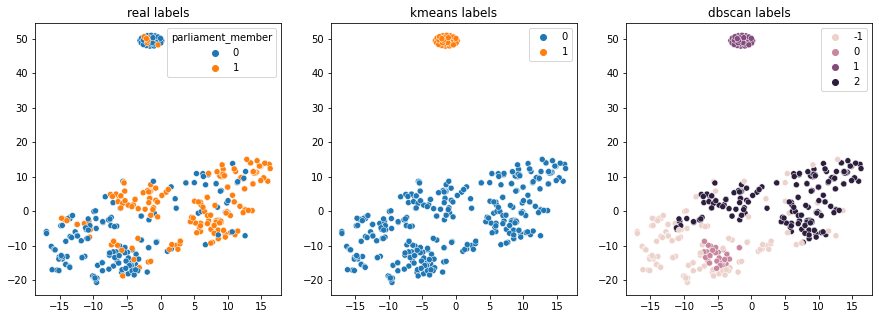

In [5]:
fig, ax = plt.subplots(1,3, figsize = [15,5])

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = labels.parliament_member, ax = ax[0])
ax[0].set_title('real labels')

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = kmeans, ax = ax[1])
ax[1].set_title('kmeans labels')

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = dbscan, ax = ax[2])
ax[2].set_title('dbscan labels')

## Supervised Learning

In [2]:
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [9]:
X = train
y = labels_train.to_numpy().ravel()

In [10]:
# Function to select the data
def get_data_(data):
    data = data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                 'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']].to_numpy()
    return data


get_data = FunctionTransformer(get_data_)


print('------------------ Support Vector Machine -------------------\n')

# The pipeline
pipeline = Pipeline([
    ('selector', get_data),
    ('svm', svm.SVC())
])

# Paramters for optimization
parameters = {'svm__C' : [0.1,0.5,1,5,10],
              'svm__kernel':['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(pipeline, parameters, n_jobs = 4)
grid.fit(X, y)
    
print(f' Best Params: {grid.best_params_}.\n Score: {grid.best_score_}')


print('\n\n------------------ kNN -------------------\n')

# The pipeline
pipeline = Pipeline([
    ('selector', get_data),
    ('knn', KNeighborsClassifier())
])

# Paramters for optimization
parameters = {'knn__n_neighbors': [i for i in range(20)],
              'knn__weights': ['uniform', 'distance']}

grid = GridSearchCV(pipeline, parameters, n_jobs = 4)
grid.fit(X, y)
    
print(f' Best Params: {grid.best_params_}.\n Score: {grid.best_score_}')

print('\n\n------------------ Logistic Regression -------------------\n')

# The pipeline
pipeline = Pipeline([
    ('selector', get_data),
    ('lr', LogisticRegression(max_iter=1000))
])

# Paramters for optimization
parameters = {'lr__penalty': ['l1', 'l2', 'elasticnet'],
              'lr__C': [0.1, 0.5, 1, 5, 10]}

grid = GridSearchCV(pipeline, parameters, n_jobs = 4)
grid.fit(X, y)
    
print(f' Best Params: {grid.best_params_}.\n Score: {grid.best_score_}')

------------------ Support Vector Machine -------------------

 Best Params: {'svm__C': 10, 'svm__kernel': 'rbf'}.
 Score: 0.8099999999999999


------------------ kNN -------------------



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.70666667 0.70666667 0.68666667 0.68666667
 0.77       0.76       0.77333333 0.75666667 0.78       0.76
 0.79333333 0.78333333 0.79       0.77333333 0.79333333 0.79
 0.8        0.78333333 0.79333333 0.78666667 0.79       0.77333333
 0.78       0.77333333 0.79333333 0.77666667 0.79666667 0.78
 0.79666667 0.78       0.79       0.78       0.79666667 0.77666667
 0.79       0.77       0.79333333 0.77333333]
  warnings.warn(


 Best Params: {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}.
 Score: 0.8


------------------ Logistic Regression -------------------

 Best Params: {'lr__C': 5, 'lr__penalty': 'l2'}.
 Score: 0.72


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.70666667        nan        nan 0.71333333        nan
        nan 0.71666667        nan        nan 0.72              nan
        nan 0.72              nan]
  warnings.warn(


                       precision    recall  f1-score   support

Not-Parliament-Member       0.87      0.80      0.83        50
    Parliament-Member       0.81      0.88      0.85        50

             accuracy                           0.84       100
            macro avg       0.84      0.84      0.84       100
         weighted avg       0.84      0.84      0.84       100



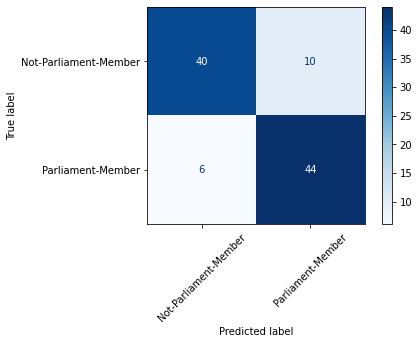

In [11]:
model_nd = Pipeline([
    ('selector', get_data),
    ('svm', svm.SVC(C=10, kernel='rbf'))
])
model_nd.fit(X,y)

target_names = ['Not-Parliament-Member', 'Parliament-Member']
predicted_labels = model_nd.predict(test)
print(classification_report(y_true = labels_test, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_nd, test, labels_test, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

## Replace negative numbers with average distance for others class

- We replace each negative number with 3

In [19]:
dist_list = []
for col in train[:150]:
    if col != 'screen_name':
        dist_list += list(train[:150][col])
dist_list = [item for item in dist_list if item >= 0]
print(np.mean(dist_list))

2.5805369127516777


In [12]:
data = data.replace(-2.0, 3)
data = data.replace(-1.0, 3)

In [13]:
from sklearn.manifold import TSNE
degree_2d = TSNE(n_components=2, random_state=96).fit_transform(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])
kmeans = 1 - kmeans

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5).fit_predict(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])

Text(0.5, 1.0, 'dbscan labels')

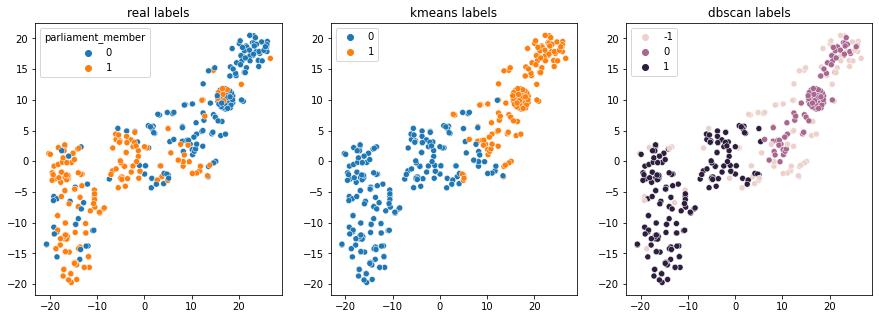

In [14]:
fig, ax = plt.subplots(1,3, figsize = [15,5])

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = labels.parliament_member, ax = ax[0])
ax[0].set_title('real labels')

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = kmeans, ax = ax[1])
ax[1].set_title('kmeans labels')

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = dbscan, ax = ax[2])
ax[2].set_title('dbscan labels')

## Supervised Learning

In [181]:
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [15]:
train = train.replace(-2.0, 3)
train = train.replace(-1.0, 3)

In [16]:
test = test.replace(-2.0, 3)
test = test.replace(-1.0, 3)

In [17]:
X = train
y = labels_train.to_numpy().ravel()

In [18]:
# Function to select the data
def get_data_(data):
    data = data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                 'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']].to_numpy()
    return data


get_data = FunctionTransformer(get_data_)


print('------------------ Support Vector Machine -------------------\n')

# The pipeline
pipeline = Pipeline([
    ('selector', get_data),
    ('svm', svm.SVC())
])

# Paramters for optimization
parameters = {'svm__C' : [0.1,0.5,1,5,10],
              'svm__kernel':['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(pipeline, parameters, n_jobs = 4)
grid.fit(X, y)
    
print(f' Best Params: {grid.best_params_}.\n Score: {grid.best_score_}')


print('\n\n------------------ kNN -------------------\n')

# The pipeline
pipeline = Pipeline([
    ('selector', get_data),
    ('knn', KNeighborsClassifier())
])

# Paramters for optimization
parameters = {'knn__n_neighbors': [i for i in range(20)],
              'knn__weights': ['uniform', 'distance']}

grid = GridSearchCV(pipeline, parameters, n_jobs = 4)
grid.fit(X, y)
    
print(f' Best Params: {grid.best_params_}.\n Score: {grid.best_score_}')

print('\n\n------------------ Logistic Regression -------------------\n')

# The pipeline
pipeline = Pipeline([
    ('selector', get_data),
    ('lr', LogisticRegression(max_iter=1000))
])

# Paramters for optimization
parameters = {'lr__penalty': ['l1', 'l2', 'elasticnet'],
              'lr__C': [0.1, 0.5, 1, 5, 10]}

grid = GridSearchCV(pipeline, parameters, n_jobs = 4)
grid.fit(X, y)
    
print(f' Best Params: {grid.best_params_}.\n Score: {grid.best_score_}')

------------------ Support Vector Machine -------------------

 Best Params: {'svm__C': 5, 'svm__kernel': 'rbf'}.
 Score: 0.8433333333333332


------------------ kNN -------------------



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.71666667 0.71666667 0.70666667 0.71333333
 0.75666667 0.75       0.74666667 0.75       0.78333333 0.77
 0.79666667 0.79333333 0.79333333 0.77666667 0.79666667 0.78666667
 0.79       0.77666667 0.78666667 0.77333333 0.80666667 0.79
 0.79333333 0.78666667 0.79666667 0.78       0.80333333 0.78
 0.79       0.77333333 0.8        0.78       0.79666667 0.78666667
 0.79666667 0.78333333 0.79333333 0.78666667]
  warnings.warn(


 Best Params: {'knn__n_neighbors': 11, 'knn__weights': 'uniform'}.
 Score: 0.8066666666666666


------------------ Logistic Regression -------------------

 Best Params: {'lr__C': 0.1, 'lr__penalty': 'l2'}.
 Score: 0.7966666666666666


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79666667        nan        nan 0.79              nan
        nan 0.79              nan        nan 0.78333333        nan
        nan 0.78              nan]
  warnings.warn(


                       precision    recall  f1-score   support

Not-Parliament-Member       0.86      0.88      0.87        50
    Parliament-Member       0.88      0.86      0.87        50

             accuracy                           0.87       100
            macro avg       0.87      0.87      0.87       100
         weighted avg       0.87      0.87      0.87       100



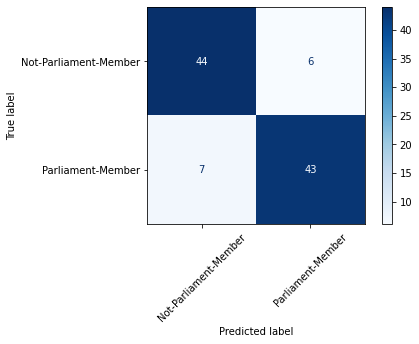

In [20]:
model_nd = Pipeline([
    ('selector', get_data),
    ('svm', svm.SVC(C=5, kernel='rbf'))
])
model_nd.fit(X,y)

target_names = ['Not-Parliament-Member', 'Parliament-Member']
predicted_labels = model_nd.predict(test)
print(classification_report(y_true = labels_test, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_nd, test, labels_test, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

## Positive Distances for errors (MAX Distance)

- We replace each negative number with 6

In [3]:
train = pd.read_csv('parliament_members_degree_of_seperation_training_set.csv', delimiter=';')
test = pd.read_csv('parliament_members_degree_of_seperation_validation_set.csv', delimiter=';')


labels_train = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_training_set.csv', 
                          usecols=['parliament_member'])

labels_test = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_validation_set.csv', 
                          usecols=['parliament_member'])

In [22]:
dist_list = []
for col in train[:150]:
    if col != 'screen_name':
        dist_list += list(train[:150][col])
dist_list = [item for item in dist_list if item >= 0]
print(np.max(dist_list))

6.0


In [32]:
data = train.append(test)
labels = labels_train.append(labels_test)

In [33]:
data = data.replace(-2.0, 6)
data = data.replace(-1.0, 6)

In [34]:
from sklearn.manifold import TSNE
degree_2d = TSNE(n_components=2, random_state=96).fit_transform(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])
kmeans = 1 - kmeans

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5).fit_predict(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])

Text(0.5, 1.0, 'dbscan labels')

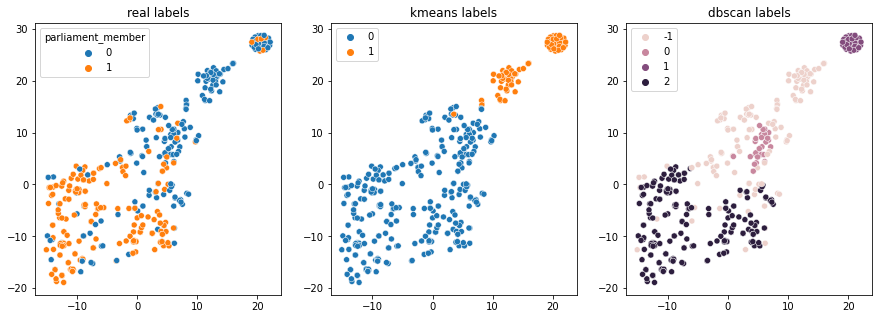

In [35]:
fig, ax = plt.subplots(1,3, figsize = [15,5])

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = labels.parliament_member, ax = ax[0])
ax[0].set_title('real labels')

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = kmeans, ax = ax[1])
ax[1].set_title('kmeans labels')

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = dbscan, ax = ax[2])
ax[2].set_title('dbscan labels')

## Supervised Learning

In [4]:
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [5]:
train = train.replace(-2.0, 6)
train = train.replace(-1.0, 6)

In [6]:
test = test.replace(-2.0, 6)
test = test.replace(-1.0, 6)

In [7]:
X = train
y = labels_train.to_numpy().ravel()

In [9]:
# Function to select the data
def get_data_(data):
    data = data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                 'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']].to_numpy()
    return data


get_data = FunctionTransformer(get_data_)


print('------------------ Support Vector Machine -------------------\n')

# The pipeline
pipeline = Pipeline([
    ('selector', get_data),
    ('svm', svm.SVC())
])

# Paramters for optimization
parameters = {'svm__C' : [0.1,0.5,1,5,10],
              'svm__kernel':['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(pipeline, parameters, n_jobs = 4)
grid.fit(X, y)
    
print(f' Best Params: {grid.best_params_}.\n Score: {grid.best_score_}')


print('\n\n------------------ kNN -------------------\n')

# The pipeline
pipeline = Pipeline([
    ('selector', get_data),
    ('knn', KNeighborsClassifier())
])

# Paramters for optimization
parameters = {'knn__n_neighbors': [i for i in range(20)],
              'knn__weights': ['uniform', 'distance']}

grid = GridSearchCV(pipeline, parameters, n_jobs = 4)
grid.fit(X, y)
    
print(f' Best Params: {grid.best_params_}.\n Score: {grid.best_score_}')

print('\n\n------------------ Logistic Regression -------------------\n')

# The pipeline
pipeline = Pipeline([
    ('selector', get_data),
    ('lr', LogisticRegression(max_iter=1000))
])

# Paramters for optimization
parameters = {'lr__penalty': ['l1', 'l2', 'elasticnet'],
              'lr__C': [0.1, 0.5, 1, 5, 10]}

grid = GridSearchCV(pipeline, parameters, n_jobs = 4)
grid.fit(X, y)
    
print(f' Best Params: {grid.best_params_}.\n Score: {grid.best_score_}')

------------------ Support Vector Machine -------------------

 Best Params: {'svm__C': 10, 'svm__kernel': 'rbf'}.
 Score: 0.8266666666666665


------------------ kNN -------------------



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.70666667 0.70666667 0.71333333 0.70666667
 0.80666667 0.79333333 0.80666667 0.78       0.8        0.79
 0.80666667 0.8        0.79333333 0.78666667 0.8        0.79333333
 0.80666667 0.79333333 0.8        0.79333333 0.80666667 0.79333333
 0.80333333 0.79333333 0.8        0.78666667 0.8        0.78666667
 0.80333333 0.79       0.81       0.79       0.80666667 0.79666667
 0.80666667 0.78       0.79666667 0.78333333]
  warnings.warn(


 Best Params: {'knn__n_neighbors': 16, 'knn__weights': 'uniform'}.
 Score: 0.8099999999999999


------------------ Logistic Regression -------------------

 Best Params: {'lr__C': 0.1, 'lr__penalty': 'l2'}.
 Score: 0.7666666666666667


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.76666667        nan        nan 0.75666667        nan
        nan 0.75              nan        nan 0.75333333        nan
        nan 0.75333333        nan]
  warnings.warn(


                       precision    recall  f1-score   support

Not-Parliament-Member       0.90      0.86      0.88        50
    Parliament-Member       0.87      0.90      0.88        50

             accuracy                           0.88       100
            macro avg       0.88      0.88      0.88       100
         weighted avg       0.88      0.88      0.88       100



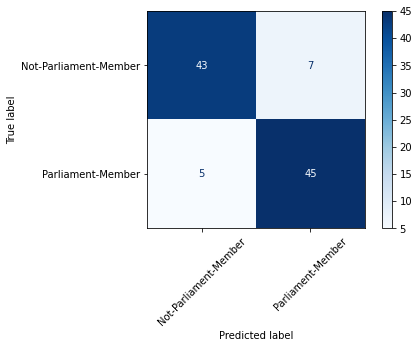

In [10]:
model_nd = Pipeline([
    ('selector', get_data),
    ('svm', svm.SVC(C=10, kernel='rbf'))
])
model_nd.fit(X,y)

target_names = ['Not-Parliament-Member', 'Parliament-Member']
predicted_labels = model_nd.predict(test)
print(classification_report(y_true = labels_test, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_nd, test, labels_test, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

## Kmeans k = 3

- We keep negative numbers

In [8]:
train = pd.read_csv('parliament_members_degree_of_seperation_training_set.csv', delimiter=';')
test = pd.read_csv('parliament_members_degree_of_seperation_validation_set.csv', delimiter=';')


labels_train = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_training_set.csv', 
                          usecols=['parliament_member'])

labels_test = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_validation_set.csv', 
                          usecols=['parliament_member'])

In [10]:
data = train.append(test)
labels = labels_train.append(labels_test)

In [11]:
from sklearn.manifold import TSNE
degree_2d = TSNE(n_components=2, random_state=96).fit_transform(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])
kmeans = 2 - kmeans

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5).fit_predict(data[['neademokratia', 'syriza_gr', 'kinimallagis', 'ellinikilisi', 'mera25_gr', 
                                                   'kmitsotakis', 'atsipras', 'FofiGennimata', 'velopky','yanisvaroufakis']])

Text(0.5, 1.0, 'dbscan labels')

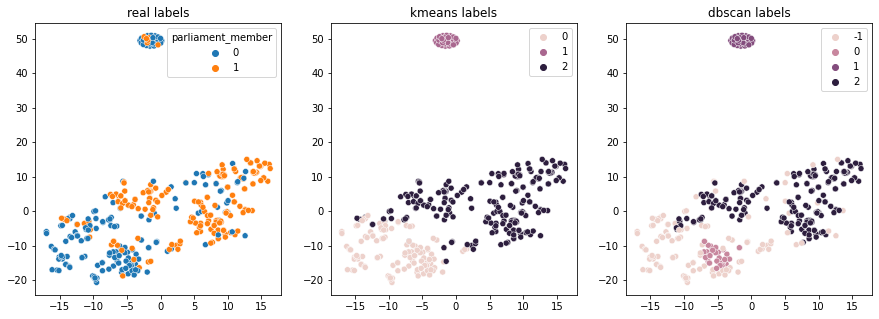

In [12]:
fig, ax = plt.subplots(1,3, figsize = [15,5])

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = labels.parliament_member, ax = ax[0])
ax[0].set_title('real labels')

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = kmeans, ax = ax[1])
ax[1].set_title('kmeans labels')

sns.scatterplot(x=degree_2d[:,0], y=degree_2d[:,1], hue = dbscan, ax = ax[2])
ax[2].set_title('dbscan labels')